# Important Discrete RVs

There are several types of discrete random variables that commonly arise in statistics and engineering applications. We review the most common ones below. We also show how to use the `scipy.stats` module to generate these random variables and work with the various functions that characterize the probability of these random variables. SciPy provides implementations of more than 80 common types of random variables, including 19 types of discrete random variables (as of SciPy 1.7.3). To prepare for our use of `scipy.stats` we will import it as `stats`:

In [2]:
import scipy.stats as stats

We will also use NumPy to create various input ranges and Matplotlib to visualize various functions:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Discrete Uniform Random Variable

In much of our previous work on probability we have considered fair experiments, where the experiment has a finite set of outcomes, all of which are equally likely.  Here we extend this idea to a random variable:


````{panels}
DEFINITION
^^^
```{glossary}
discrete uniform random variable
    A random variable that has a finite number of values in its range 
and for which all of its values have the same probability.
```
````


For example, if we roll a fair die and let $X$ be the number on the top face, then $X$ is a discrete uniform random variable with

$$
P_X(x) = 
\begin{cases}
1/6, & x \in \{1,2,3,4,5,6\} \\
0, & \mbox{o.w.}
\end{cases}
$$

We can create a discrete uniform random variable in `scipy.stats` using `stats.randint()`:

In [9]:
?stats.randint

Signature:       stats.randint(*args, **kwds)
Type:            randint_gen
String form:     <scipy.stats._discrete_distns.randint_gen object at 0x7ff6ad34e310>
File:            /Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A uniform discrete random variable.

As an instance of the `rv_discrete` class, `randint` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(low, high, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, low, high, loc=0)
    Probability mass function.
logpmf(k, low, high, loc=0)
    Log of the probability mass function.
cdf(k, low, high, loc=0)
    Cumulative distribution function.
logcdf(k, low, high, loc=0)
    Log of the cumulative distribution function.
sf(k, low, high, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
lo

That help is long and complete, and it will be up-to-date with the latest version of `scipy.stats`. However, it is much more practical to refer to the web page [scipy.stats.randint](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html). I have included an image of the most important part below:

![](figs/scipy-stats-randint.png)


We specify the values that the random variable will take on by specifying `low` and `high` values. As in most Python functions, the actual values that the random variable will take on will not include `high`; the actual highest value is `high - 1`.

Now let's see how to create and work with the discrete uniform distribution in Python.

We will use an object-oriented (OO) approach in working with distributions in `scipy.stats`; however, you will not need to have any background in OO programming to understand this. Basically, we will create an object with the desired distribution by calling the specified `scipy.stats` random variable type with the desired distribution parameters as the argument, and we will assign the output to a variable. 

So, to create a random variable that represents the value on the top face when rolling a fair 6-sided die. It is convention to use $U$ for such a random variable if that does not conflict with other random variables' names. In Python, we can create an object to model this random variable like:

In [29]:
U = stats.randint(1, 7)

Alternatively, we can pass `low` and `high` as keyword parameters if we want to be more explicit:

In [30]:
U = stats.randint(low = 1, high = 7)

U is an *object*, and it has *methods* to work with the discrete uniform random variable with the given parameters. **Methods are just like functions, except that they belong to an object, and their behavior is affected by the internal attributes (i.e., properties) of the object.**

For instance, when we created `U`, we set its attributes were set to generate a values from 1 to 6 (inclusive).  You can use Python's help function to see the methods of `U`:

In [76]:
help(U)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here

A few of these should look familiar: pmf, cdf, and sf refer to the same functions that we abbreviated in {doc}`discrete-rvs` and {doc}`cdfs`: the probability mass function, cumulative distribution function, and survival function, respectively. Each of the methods can be called by adding it to the object name after a period, followed by parentheses. Any parameters or values for the method should be given in the parentheses. 

We can get the interval containing the range of a random variable in `scipy.stats` using the support method:

In [32]:
U.support()

(1, 6)

```{warning}

Note that `support` returns the lowest value in the range and the highest value in the range, so be careful in using this method. If these values were used as arguments to create a new `stats.randint` object, that object would have a different range!  
```

We can evaluate the PMF at any value:

In [77]:
U.pmf(3)

0.16666666666666666

Note that these methods can also take lists or vectors as their arguments:

In [79]:
uvals = np.arange(1, 7)
U.pmf(uvals)

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

Let's plot the PMF for this random variable:

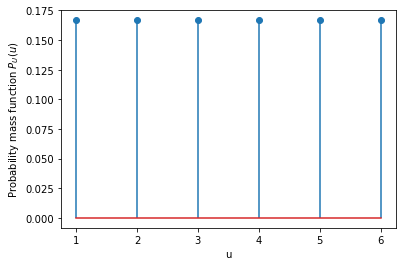

In [34]:
plt.stem(uvals, U.pmf(xvals), use_line_collection=True );
plt.xlabel('u')
plt.ylabel('Probability mass function $P_U(u)$');

We can use the `rvs` method to draw random values from this random variable. The argument is the number of random values to generate:

In [36]:
num_sims = 10_000
u = U.rvs(num_sims)
print(u[:20])

[5 5 1 4 4 2 3 4 2 2 4 6 6 2 2 3 5 4 1 6]


Let's use `plt.hist` to see if the relative frequencies are approximately equal:

(array([1677.,    0., 1602.,    0., 1667.,    0., 1708.,    0., 1689.,
        1657.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

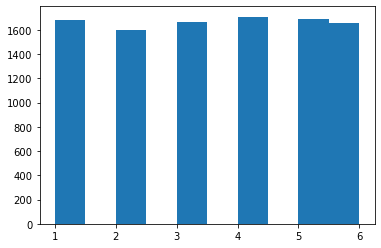

In [44]:
plt.hist(u )

The look to have equal counts but have a strange spacing. That is because `plt.hist()` by default has 10 bins, whereas the data only takes on 6 values. We will get much better results if we specify the bins. For discrete random variables with a contiguous set of integer values, specifying the number of bins may work out:

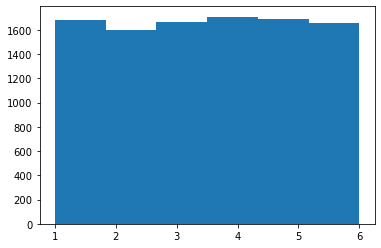

In [63]:
counts, mybins, patches = plt.hist(u, bins=6)

However, look at the set of bin edges returned: 

In [58]:
print(mybins)

[1.         1.83333333 2.66666667 3.5        4.33333333 5.16666667
 6.        ]


In general, it is safest to specify the exact bin edges to use. But again, we must be careful in dealing with the upper value, and this time doubly so. When providing a list of bin edges, they `plt.hist` interprets them as follows:

       **bins** : *array* 
            The edges of the bins. Length nbins + 1 (nbins left edges and right edge of last bin). 
            
For the last bin, we need to provide the value 6 as the left edge, and we need to provide another higher value (say, 7) as the right edge. Since a `range` or `np.arange` does not include its last value, we will need to specify a value 1 higher than 7:

In [61]:
newbins = range(1, 8)
list(newbins)

[1, 2, 3, 4, 5, 6, 7]

(array([1677., 1602., 1667., 1708., 1689., 1657.]),
 array([1, 2, 3, 4, 5, 6, 7]),
 <a list of 6 Patch objects>)

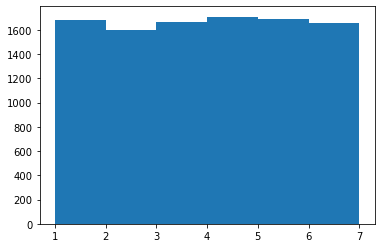

In [60]:
plt.hist(u, bins=newbins)

When working with discrete random variables, we can get the relative frequencies from `plt.hist()` by passing the `density=True` keyword argument, **provided the random variable is defined on the integers and bins of length 1 are used**.

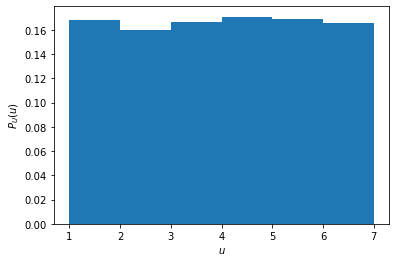

In [66]:
plt.hist(u, bins=newbins, density = True)
plt.xlabel('$u$')
plt.ylabel('$P_U(u)$');

As expected, the relative frequencies match the PMF values closely.

Next, we plot the CDF. Since the CDF takes on nonzero values in between the values the random variable takes on, we will plot it for a finer mesh of $u$ values:

Text(0, 0.5, '$F_U(u)$')

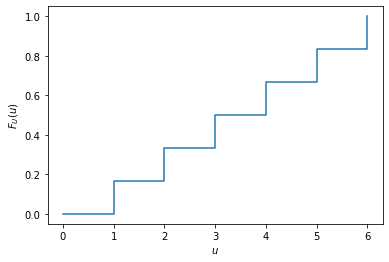

In [72]:
uvals2 = np.linspace(0, 6, 61)
plt.step(uvals2, U.cdf(uvals2), where = 'post' )

plt.xlabel('$u$')
plt.ylabel('$F_U(u)$')

Finally, let's compare the cumulative histogram (with both `cumulative = True` and `density = True`) to the CDF:

Text(0, 0.5, '$F_U(u)$')

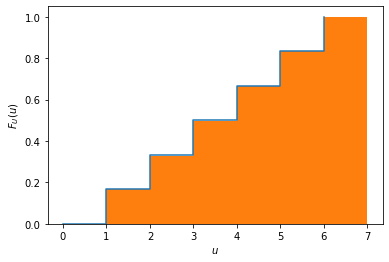

In [74]:
uvals2 = np.linspace(0, 6, 61)
plt.step(uvals2, U.cdf(uvals2), where = 'post' )
plt.hist(u, cumulative = True, density = True, bins = newbins)

plt.xlabel('$u$')
plt.ylabel('$F_U(u)$')

**Exercise:** What happens if we plot the cumulative histogram without specifying the bins? Why do you think that happens?

## Bernoulli Random Variable

The Bernoulli random variable is another of the simplest of the discrete random variables, and it is the simplest random variable that can take on unequal probabilities. We give an 
informal definition:



````{panels}
DEFINITION
^^^
```{glossary}
Bernoulli random variable
    A Bernoulli random variable $B$ takes on value of 0 or 1. It is specified by a parameter $p$ such that $P(B=1) = p$ and $P(B=0) = 1-p$.
```
````


Formally, we can define the Bernoulli random variable as follows:

Let $(S, \mathcal{F}, P)$ be a probability space. Let $A \in \mathcal{F}$ be an event and define $p=P(A)$; for instance, $A$ may be an event corresponding to a "success".  Then define the Bernoulli random variable $B$ by

$$
B = 
\begin{cases}1, & s\in A \\
0, & s\notin A 
\end{cases}
$$

The PMF for a Bernoulli RV $B$ is

$$
p_B(b) = 
\begin{cases}
p, & b=1\\
1-p, & b=0\\
0,& \mbox{o.w.}
\end{cases}
$$

We have already given examples of two binary random variables in Examples 1 and 2 in {doc}`discrete-rvs`. There are many other phenomena that may be modeled as Bernoulli random variables. Some engineering examples include:
* whether a bit is 0 or 1
* whether a bit is in error in a communication system
* whether a component of a system has failed
* whether a sensor detects some phenomena.


`````{note} **DISTRIBUTIONS OF RANDOM VARIABLES**

We introduce a definition and some notation to facilitate discussing random variables of common types. 


````{panels}
DEFINITION
^^^
```{glossary}
distribution (of a random variable)
  The *distribution* of a random variable is a characterization of how the random variable maps sets of values to probabilities. For instance, the distribution may refer to a particular type of random variable along with whatever parameter(s) are required to completely specify the probabilities for that type of random variable. 
```
````

When the distribution refers to a particular type of random variable, we write either that a random variable has that distribution or that the random variable is *distributed* according to that type. For example, if $X$ is a Bernoulli random variable with  $p=P(X=1)$, then we say that $X$ has a Bernoulli($p$) distribution or that $X$ is distributed Bernoulli($p$). Both of these statements have the same meaning, and we will denote this in shorthand notation as 

$$
X \sim \text{Bernoulli}(p).
$$
`````



We now show how to work with the Bernoulli random variable using `scipy.stats`. First, review the help page for `stats.bernoulli`:

In [3]:
?stats.bernoulli

Signature:       stats.bernoulli(*args, **kwds)
Type:            bernoulli_gen
String form:     <scipy.stats._discrete_distns.bernoulli_gen object at 0x7fc9d0260990>
File:            /Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A Bernoulli discrete random variable.

As an instance of the `rv_discrete` class, `bernoulli` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(p, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, p, loc=0)
    Probability mass function.
logpmf(k, p, loc=0)
    Log of the probability mass function.
cdf(k, p, loc=0)
    Cumulative distribution function.
logcdf(k, p, loc=0)
    Log of the cumulative distribution function.
sf(k, p, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, p, loc=0)
    Log of the surviv


For instance, to create a Bernoulli random variable $B_1$ with probability $P(B_1 = 1) = 0.2$, we will use the following Python code:

In [83]:
B1=stats.bernoulli(0.2)

`B1` is now an object that represents a Bernoulli random variable with parameter $p=0.2$.

In [84]:
help(B1)

Help on rv_frozen in module scipy.stats._distn_infrastructure object:

class rv_frozen(builtins.object)
 |  rv_frozen(dist, *args, **kwds)
 |  
 |  # Frozen RV class
 |  
 |  Methods defined here:
 |  
 |  __init__(self, dist, *args, **kwds)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  cdf(self, x)
 |  
 |  entropy(self)
 |  
 |  expect(self, func=None, lb=None, ub=None, conditional=False, **kwds)
 |  
 |  interval(self, alpha)
 |  
 |  isf(self, q)
 |  
 |  logcdf(self, x)
 |  
 |  logpdf(self, x)
 |  
 |  logpmf(self, k)
 |  
 |  logsf(self, x)
 |  
 |  mean(self)
 |  
 |  median(self)
 |  
 |  moment(self, n)
 |  
 |  pdf(self, x)
 |  
 |  pmf(self, k)
 |  
 |  ppf(self, q)
 |  
 |  rvs(self, size=None, random_state=None)
 |  
 |  sf(self, x)
 |  
 |  stats(self, moments='mv')
 |  
 |  std(self)
 |  
 |  support(self)
 |  
 |  var(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here

Let's inspect and then plot the PMF values:

In [85]:
b=np.arange(-1,3)
B1.pmf(b)

array([0. , 0.8, 0.2, 0. ])

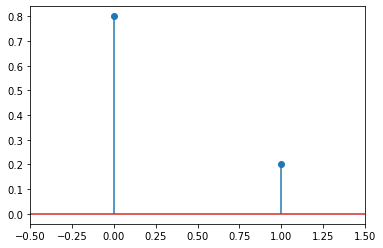

In [86]:
plt.stem(b, B1.pmf(b), use_line_collection = True)
plt.xlim(-0.5, 1.5);

The CDF also works as expected:

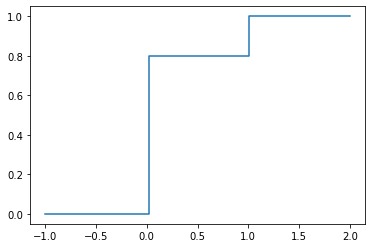

In [87]:
x=np.linspace(-1,2,101)
plt.step(x, B1.cdf(x), where='post');

Each `scipy.stats` random variables also has the ability to draw random values from the specified distribution (i.e., to get values of the random variable).  The method to do this is called `rvs`. If it is called with no argument, then it generates a single value of that random variable:

In [10]:
B1.rvs()

0

More commonly, we pass the number of random values we want to generate as an argument:

In [11]:
B1.rvs(10)

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0])

Lets simulate 100_000 values of the Bernoulli(0.2) random variable and plot a histogram of the values. We will also capture the output counts to compare the relative frequencies with the true values:

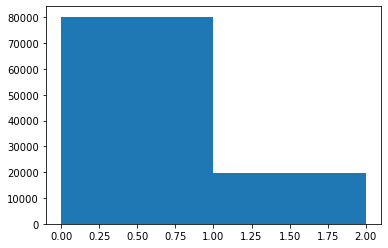

In [12]:
num_sims=100_000
b=B1.rvs(num_sims)
mybins=[0,1,2]
counts, mybins, patches  = plt.hist(b, bins=mybins)

Then the relative frequencies are:

The relative freqs are [0.80213 0.19787]


<StemContainer object of 3 artists>

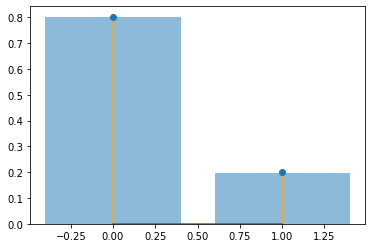

In [18]:
print(f'The relative freqs are {counts/num_sims}')
plt.bar([0,1], counts/num_sims, alpha=0.5)

plt.stem([0,1], B1.pmf([0,1]), linefmt='orange', use_line_collection=True)


## Binomial Random Variable

One of the next most common types of discrete random variables arises when we have $N$ repeated, independent Bernoulli trials with identical probability of success $p$. Let $B_2$ be the number of successes. Then $B_2$ is a Binomial$(N,p)$ random variable. For example, in our very first experiments in {doc}`../02-first-stats/motivating-problem`, we considered the probability of seeing 6 or fewer heads when a fair coin is tossed 20 times. We can model the number of heads as Binomial(20, 0.5) random variable.  

Note that we can also think of a Binomial$(n,p)$ random variable as the **sum** of $n$ independent Bernoulli$(p)$ random variables. 

In shorthand notation, we will write
    
$$B_2 \sim \text{Binomial}(n,p)$$

The PMF for a Binomial random variable is easily derived:
* For $N$ trials with probability of success $p$, the probability of a particular ordering of $k$ successes is $p^k(1-p)^{N-k}$. 
* The number of different orderings of $k$ successes and $N-k$ failures in $N$ total trials is 

$$
\binom{N}{k}.
$$

Thus the probability of getting $k$ successes on $N$ independent Bernoulli($p$) trials is

$$
\binom{N}{k} p^k(1-p)^{N-k}. 
$$

Here, the variable $k$ was used instead of $b$ because $k$ is used widely in practice to represent a number of successes for a Binomial random variable.

The PMF for a Bernoulli random variable $B2$ is
$$
p_{B_2}(k) = 
\begin{cases}
\binom{N}{k} p^k (1-p)^{N-k}, & k=0,1,\dots,N \\
0, & \mbox{o.w.} 
\end{cases} 
$$

Some engineering examples include:
* the number of bits in error in a packet
* the number of defective items in a manufacturing run

A binomial random variable can be created in `scipy.stats` using `stats.binom`. The number of trials and probability of success must be passed as the arguments:

In [24]:
B2=stats.binom(10,0.2)

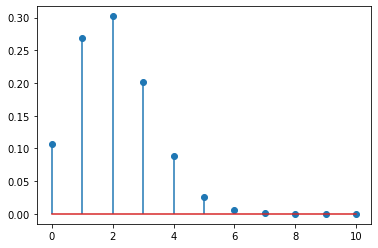

In [33]:
k = range(0, 11)
plt.stem(k, B2.pmf(k), use_line_collection = True);

Intuitively, if $p$ is small (such as $p=0.2$ in the example above), then most of the probability  mass will be around the small values of the random variable. Moreover, most people have the sense that if we conduct $N$ trials with probability $p$, then the most likely outcomes will be around $Np$. We see that this is true for our example of $N=10$ and $p=0.2$ -- the value with the highest probability is $Np=2$. If we increase $p$ to 0.6, we get the following pmf:

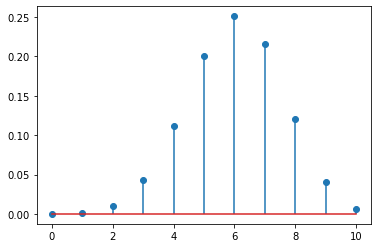

In [32]:
B3 = stats.binom(10, 0.6)
plt.stem(k, B3.pmf(k), use_line_collection = True);

Again, $Np=6$ is the most common value. Let's try $p=0.75$, for which $NP=7.5$ is not a possible value of the random variable:

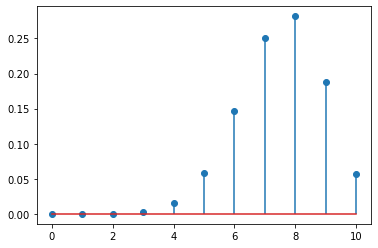

In [31]:
B4 = stats.binom(10, 0.75)
plt.stem(k, B4.pmf(k), use_line_collection = True);

For the Binomial(10, 0.75) random variable, the value with the highest probability is 8, which is close to $Np=7.5$.

Here is a plot of the CDF for the Binomial(10, 0.75) random variable:

In [88]:
k = np.linspace(0, 12, 1000)
plt.step(k, B4.cdf(k), where='post');

NameError: name 'B4' is not defined

Note that the region where the CDF is increasing quickly is the region where most of the probability is concentrated (since the size of the jumps is equal to the probabilities at the location of the jumps). Finally, we compare a cumulative histogram (with `density=True`) to the CDF:

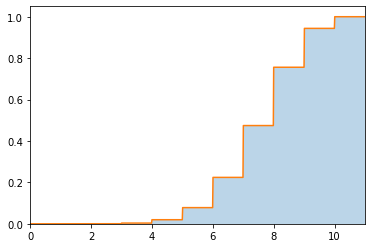

In [47]:
b4=B4.rvs(100_000)
mybins=range(0,12) 
plt.hist(b4, bins=mybins, cumulative = True, density = True, alpha = 0.3);
plt.plot(k, B4.cdf(k));
plt.xlim(0,11);

##  Geometric Random Variable

Consider now if we conduct independent Bernoulli($p$) trials until the first success and let $G$ be the total number of trials. Then $G$ is a Geometric($p$) random variable. We already encountered such a scenario in Example 5 of {doc}`discrete-rvs`, where we flipped a fair coin until the first Heads. The Geometric random variable generalizes that example to handle Bernoulli trials with arbitrary probabilities. Unlike the Binomial, the Geometric random variable 
$$X \sim \text{Geometric}(p)$$ does not have a finite range; that is, we cannot specify any particular maximum number of Bernoulli trials that might be required to get the first success. However, since the range is the counting numbers ($1,2,3, \ldots$), it is countable.  

It may seem that if the range of a random variable is an infinite set, then it will not be possible to assign a non-zero probability to every outcome. However, the Geometric random variable shows that this is not true. It is possible to assign non-zero probabilities to a discrete random variable with a countable number of outcomes, provided that the probabilities go to zero fast enough. 

The PMF of $G \sim \mbox{Geometric}(p)$  is

$$
p_G(k) =
\begin{cases}
p(1-p)^{k-1}, & k=1,2,\dots \\ 
0, & \text{o.w.}\\
\end{cases}
$$

Note that 

\begin{align*}
\sum_{k=1}^{\infty} p (1-p)^{k-1} &= p \sum_{m=0}^{\infty} (1-p)^m \\
&= p \left( \frac 1 p \right) =1,
\end{align*}
so the total probability assigned to all the outcomes sums to 1.

Some examples include:
* The number of transmissions required for a packet to be successfully received when transmitted over a noisy channel and retransmitted whenever the received version is corrupted by noise.
* An book publisher is promoting a book on the foundations of data science at a conference. The attendees use  Python, R, or SPSS for computational data analysis.  The number of people that the publisher must talk to before finding one that uses Python for data analysis is a geometric random variable.


A geometric random variable can be created in `scipy.stats` as `stats.gemo()`, where the argument is the probability of success for the Bernoulli trials. See the help for a list of methods, which are similar to those available for the other discrete random variables that we have introduced:

In [49]:
?stats.geom

Signature:       stats.geom(*args, **kwds)
Type:            geom_gen
String form:     <scipy.stats._discrete_distns.geom_gen object at 0x7fc9d026c190>
File:            /Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/_discrete_distns.py
Docstring:      
A geometric discrete random variable.

As an instance of the `rv_discrete` class, `geom` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(p, loc=0, size=1, random_state=None)
    Random variates.
pmf(k, p, loc=0)
    Probability mass function.
logpmf(k, p, loc=0)
    Log of the probability mass function.
cdf(k, p, loc=0)
    Cumulative distribution function.
logcdf(k, p, loc=0)
    Log of the cumulative distribution function.
sf(k, p, loc=0)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(k, p, loc=0)
    Log of the survival function.
ppf(q, 

In [50]:
G=stats.geom(0.2)

In [51]:
g=G.rvs(100000)

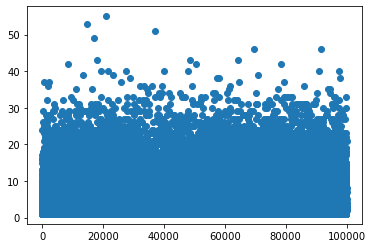

In [53]:
plt.scatter(range(len(g)),g);

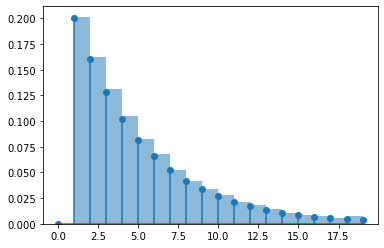

In [55]:
vals=range(20)
plt.hist(g,bins=vals,density=True,alpha=0.5)
plt.stem(vals,G.pmf(vals), use_line_collection = True);

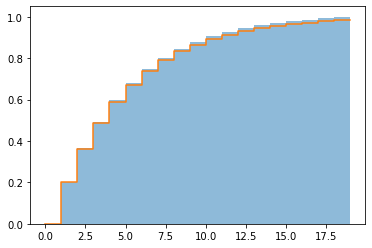

In [56]:
g=G.rvs(100000)
vals=range(20)
plt.hist(g,bins=vals,density=True,alpha=0.5,cumulative=True)
plt.step(vals,G.cdf(vals), where='post');

Rather than derive the cdf for a geometric random variable mathematically, we will determine it from a simple argument that is easy to remember. Consider instead the probability $P(G>k)$, which is the value of the survival function for $G$ with argument $k$. If $G>g$, more than $g$ trials are required **because there have been no successes in the first $g$ trials**. Thus, we can calculate $P(G>g)$ as

\begin{align*}
P(G >g) &= \operatorname{Pr} \left( \mbox{no successes on } g \mbox{ consecutive independent Bernoulli}(p) \mbox{ trials} \right) \\
&= (1-p)^g.
\end{align*}

Then the CDF for $G$ is 

$$
P(G \le k) = 1 - P(G>k) = 1 - (1-p)^g.
$$


Text(0, 0.5, 'CDF of geometric RV, $G(k)$')

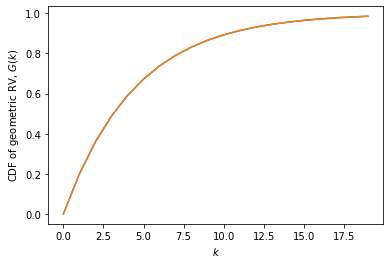

In [63]:
plt.plot(vals, G.cdf(vals) )
plt.plot(vals, 1 - np.power((1-0.2), vals) )
plt.xlabel('$k$')
plt.ylabel('CDF of geometric RV, $G(k)$')

## Poisson Random Variable

First things first -- Poisson is French and roughly pronounced "pwah - sahn". It is named after the French mathematician Siméon Denis Poisson ([Wikipedia article on Siméon Denis Poisson](https://en.wikipedia.org/wiki/Siméon_Denis_Poisson)).

The Poisson random variable is used to model phenomena that occur randomly over time or space. A Poisson random variable is the number of occurrences given the average rate at which the phenomena occur and the length of time or area of space being considered. We will use the following notation for parameters associated with a random variable:

* $\lambda$ is the average rate of occurrences over time or space,
* $T$ is some measure of time or space that is being considered, and
* $\alpha = \lambda T$ is the average 




**JMS: WORKING HERE**

<StemContainer object of 3 artists>

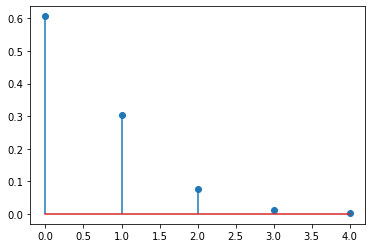

In [89]:
P2=stats.poisson(0.5)
x2=range(5)
plt.stem(x2, P2.pmf(x2), use_line_collection = True)

<StemContainer object of 3 artists>

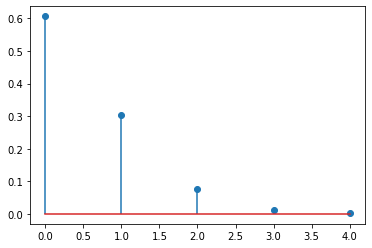

In [11]:
plt.stem(x2,P2.pmf(x2),use_line_collection=True)

<StemContainer object of 3 artists>

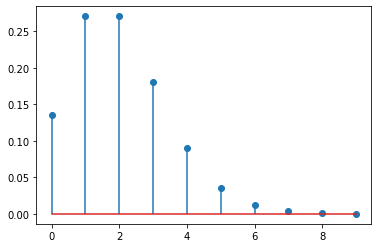

In [12]:
P3=stats.poisson(2)
x3=range(10)
plt.stem(x3,P3.pmf(x3),use_line_collection=True)

In [13]:
P=stats.poisson(20)

In [14]:
x=range(40)

<StemContainer object of 3 artists>

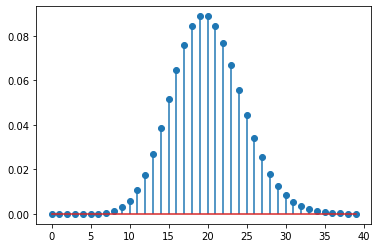

In [15]:
plt.stem(x,P.pmf(x),use_line_collection=True)

In [16]:
Pvals=P.rvs(size=10000)

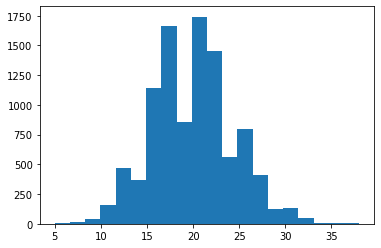

In [17]:
plt.hist(Pvals,bins=20);# then 30

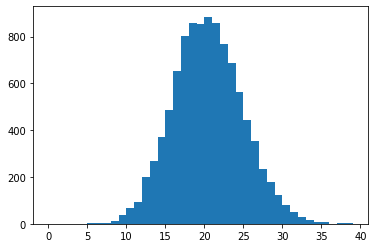

In [19]:
plt.hist(Pvals,bins=x);

**Example** An engineering professor makes an average of 60 mistakes during lectures over the course of a typical semester. A semester consists of 40 lectures, each of which is 50 minutes long.

a) In a new semester, what is the probability that the professor makes at least one mistake during some 20 minute period?

In [20]:
l=60/(40*50) # lambda in mistakes/minute
l

0.03

In [21]:
a=l*20 # average number of mistakes in 20 minutes
a

0.6

In [25]:
X=stats.poisson(a)

In [26]:
# P(X>0)= 1- P(X<=0)= 1-F_X(0) 
1-X.cdf(0)

0.4511883639059735

In [27]:
# The value above is the survival function
X.sf(0)

0.45118836390597344

b) What is the probability that the professor makes 4 mistakes in a lecture?

In [28]:
a50=l*50 # average number of mistakes in one 50-minute lecture

In [30]:
Y=stats.poisson(a50)

In [32]:
Y.pmf(4)

0.04706651815630941

c) What is the probability that the professor has at least one lecture with 4 or more mistakes in a semester?

Let $p$= probability of 4 or more mistakes in one lecture

Let $Z$ = number of lecture with 4 or more mistakes in a 40-lecture semester

Then $Z$ is Binomial(40, $p$)

We need to find $p$ first

In [35]:
p=Y.sf(3) # Because this is P(Y>3)=P(Y>=4)
p

0.06564245437845008

In [37]:
Z=stats.binom(40,p)

In [38]:
Z.sf(0)

0.9338509079376733

# Arbitrary Discrete RVs

We can create a discrete random variable with an  finite set of integer values  using the `stats.rv_discrete()` method:

In [64]:
?stats.rv_discrete

Init signature:
stats.rv_discrete(
    a=0,
    b=inf,
    name=None,
    badvalue=None,
    moment_tol=1e-08,
    values=None,
    inc=1,
    longname=None,
    shapes=None,
    extradoc=None,
    seed=None,
)
Docstring:     
A generic discrete random variable class meant for subclassing.

`rv_discrete` is a base class to construct specific distribution classes
and instances for discrete random variables. It can also be used
to construct an arbitrary distribution defined by a list of support
points and corresponding probabilities.

Parameters
----------
a : float, optional
    Lower bound of the support of the distribution, default: 0
b : float, optional
    Upper bound of the support of the distribution, default: plus infinity
moment_tol : float, optional
    The tolerance for the generic calculation of moments.
values : tuple of two array_like, optional
    ``(xk, pk)`` where ``xk`` are integers and ``pk`` are the non-zero
    probabilities between 0 and 1 with ``sum(pk) = 1``. ``xk

Note that this method implicitly assumes that the discrete random variable is defined on a subset of the integers. 

Let's use this method to create a random variable based on Example 3 of {doc}`discrete-rvs`. Note that we need to pass a tuple that includes:
* a list or vector containing the random variable's range, and 
* a list or vector containing the probabilities of each point in the random variable's range.

In [90]:
range1=[0, 1, 2]
probs1=[1/4, 1/2, 1/4]

In [91]:
A = stats.rv_discrete(values=(range1, probs1))

Now we can work with the random variable `A` using the same methods that we used for pre-defined discrete random variables in `scipy.stats`.

We will use `A` to demonstrate how to work with such a random variable. If we want to plot the PMF for a random variable created in this way, we can first determine the range of `A`, using `support()` method:

In [92]:
A.support()

(0, 2)


If we want to plot the PMF for every value in the support, then we can use `np.arange()` to create a numpy vector of these values. We will capture the outputs of `support()` into  variables `low` and `high`, and we will need to pass `high+1` as the second argument to `np.arange()` because upper values are not included in the created vector:

In [100]:
low, high = A.support()
avals = np.arange(low, high+1)
print(avals)

[0 1 2]


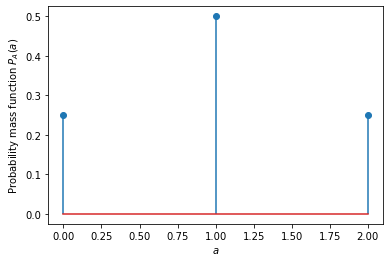

In [102]:
plt.stem(avals, A.pmf(avals), use_line_collection = True )
plt.xlabel('$a$')
plt.ylabel('Probability mass function $P_A(a)$');

Let's simulate some random values from this distribution and compute the relative frequencies:

In [127]:
num_sims = 100_000
a = A.rvs( size = num_sims )

In [105]:
avals, counts = np.unique(a, return_counts = True)

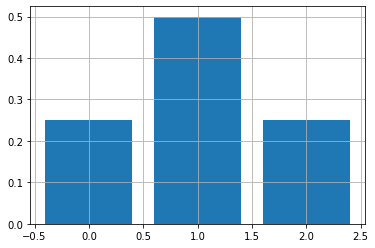

In [113]:
plt.bar( avals, counts / num_sims)
plt.grid();

As expected, the relative frequencies closely match the probabilities.

Now, let's compare the analytical CDF to the empirical CDF generated bh `plt.hist()`:

(array([0.25006, 0.74861, 1.     ]),
 array([0, 1, 2, 3]),
 <a list of 3 Patch objects>)

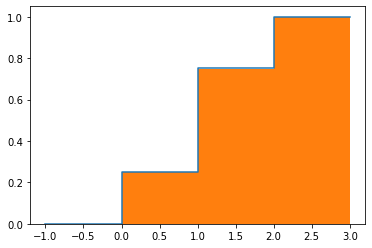

In [134]:
avals2 = np.linspace(-1, 3, 81)
plt.step(avals2, A.cdf(avals2), where='post' )
plt.hist(a, cumulative = True, density = True, bins = [0, 1, 2, 3])